## Week 14 Lecture 1: Image Processing

Using 2D Fourier Transforms, we can process images since images are 2D signals. We will apply Fourier Transform filters to various images in this code notebook.

### 2D DFT Implementation

Although FFT algorithms are built-in various libraries and can be used, we implement our own 2D DFT to learn how Fourier Transform is implemented step-by-step. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def dft_matrix(N):
    # Remember that DFT matrix is NxN. Get the row and column vectors:
    k = np.arange(N)[:, None]
    n = np.arange(N)[None, :]
    return np.exp(-2j * np.pi * k * n / N)

def idft_matrix(N):
    # (1/N) * conjugate of DFT matrix
    return np.conj(dft_matrix(N)) / N

def dft2(x):
    # For 2D DFT, we apply 1D DFT along rows and columns!
    M, N = x.shape
    WM = dft_matrix(M)
    WN = dft_matrix(N)
    return WM @ x @ WN

def idft2(X):
    M, N = X.shape
    WMH = idft_matrix(M)
    WNH = idft_matrix(N)
    return WMH @ X @ WNH

### Generate image and filter: f(m,n) from slides

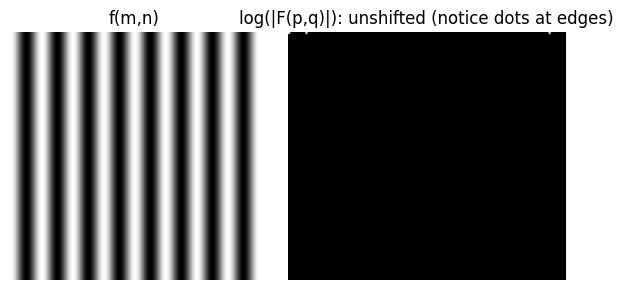

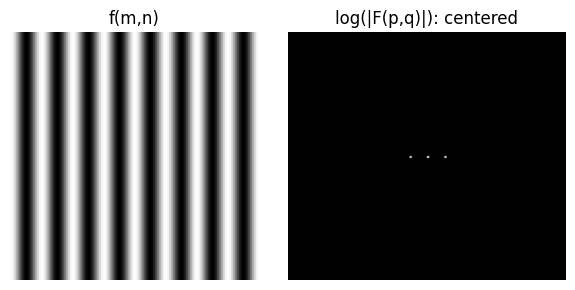

In [42]:
M = 128
N = 128
kx = 8  # number of cycles in horizontal direction (number of stripes)
# create image grid:
xx, yy = np.meshgrid(np.arange(N), np.arange(M))

# the image is simply a cosine pattern! You can guess frequencies in the DFT from here already.
img_f = 0.5 + 0.5*np.cos(2*np.pi * kx * xx / N)

# compute DFT now:
F = dft2(img_f)

mag = np.log1p(np.abs(F))
# center the zero frequency component for better visualization
mag = np.fft.fftshift(mag)
""" 
The fftshift function above rearranges the output "mag" as follows
(uses np.roll internally):https://numpy.org/doc/stable/reference/generated/numpy.roll.html
In this case, for "mag", it shifts the array by half of its size along both dimensions (X and Y of the image)
    axes = tuple(range(mag.ndim)) # the dimensions of the array
    # for 2D images: axes = (0,1)
    shift = []
    # mag is (128,128) shape. Shift by 64 along both dimensions 
    # => brings the frequency components from the edges to the center!
    for dim in mag.shape:
        shift.append(dim // 2)
    return np.roll(mag, shift, axes)
"""
# plot the unshifted image and its spectrum
fig, ax = plt.subplots(1, 2, figsize=(6, 3))
ax[0].imshow(img_f, cmap='gray', aspect='equal')
ax[0].set_title("f(m,n)")
ax[0].axis('off')
ax[1].imshow(np.log1p(np.abs(F)), cmap="gray", aspect='auto')
ax[1].set_title("log(|F(p,q)|): unshifted (notice dots at edges)")
ax[1].axis('off')
fig.tight_layout()
plt.show()


fig, ax = plt.subplots(1, 2, figsize=(6, 3))
ax[0].imshow(img_f, cmap='gray', aspect='equal')
ax[0].set_title("f(m,n)")
ax[0].axis('off')

ax[1].imshow(mag, cmap="gray", aspect='auto')
ax[1].set_title("log(|F(p,q)|): centered")
ax[1].axis('off')

fig.tight_layout()
plt.show()


### Why do you see three dots in the frequency domain?

1. The DC component is the mean value of the signal (recall week 4 material): here, its the mean brightness.
2. Two symmetric values due to the cosine in the signal at +kx and at -kx.

### Horizontal stripes: g(m, n) from slides

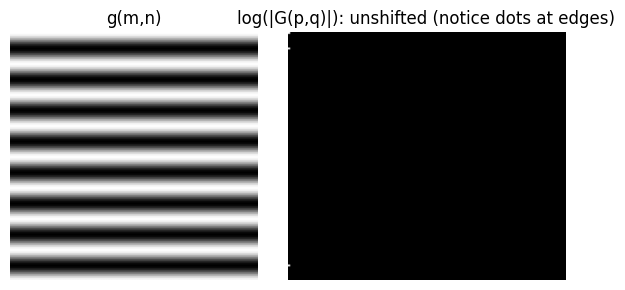

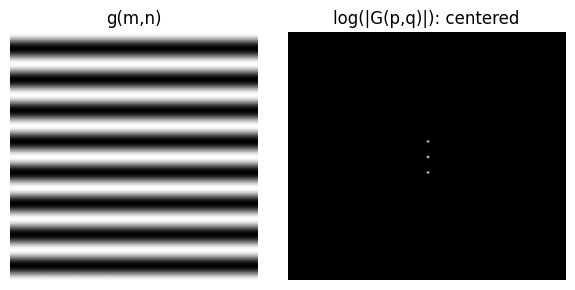

In [ ]:
M = 128
N = 128
ky = 8  # number of cycles in horizontal direction (number of stripes)
# create image grid:
xx, yy = np.meshgrid(np.arange(N), np.arange(M))

# the image is simply a cosine pattern! You can guess frequencies in the DFT from here already.
img_g = 0.5 + 0.5*np.cos(2*np.pi * ky * yy / M)
# compute DFT now:
G = dft2(img_g)

mag = np.log1p(np.abs(G))
# center the zero frequency component for better visualization
mag = np.fft.fftshift(mag)
# plot the unshifted image and its spectrum
fig, ax = plt.subplots(1, 2, figsize=(6, 3))
ax[0].imshow(img_g, cmap='gray', aspect='equal')
ax[0].set_title("g(m,n)")
ax[0].axis('off')
ax[1].imshow(np.log1p(np.abs(G)), cmap="gray", aspect='auto')
ax[1].set_title("log(|G(p,q)|): unshifted (notice dots at edges)")
ax[1].axis('off')
fig.tight_layout()
plt.show()

# plot the centered spectrum
fig, ax = plt.subplots(1, 2, figsize=(6, 3))
ax[0].imshow(img_g, cmap='gray', aspect='equal')
ax[0].set_title("g(m,n)")
ax[0].axis('off')

ax[1].imshow(mag, cmap="gray", aspect='auto')
ax[1].set_title("log(|G(p,q)|): centered")
ax[1].axis('off')

fig.tight_layout()
plt.show()


### In-class Activity (for students): Work on creating (f + g) image and show its sprectrum

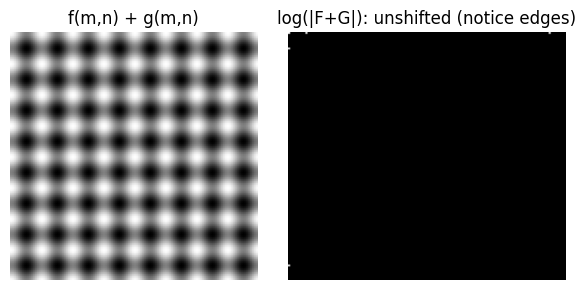

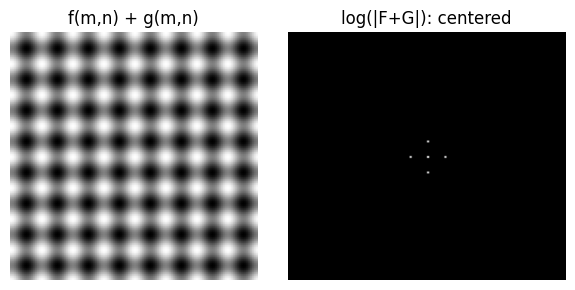

In [ ]:
"""
Solution to the activity: students can work on this during the lecture
"""

#### WRITE YOUR CODE BELOW ####

img_fg = img_f + img_g

# DFT
S = dft2(img_fg)

# unshifted and centered log-magnitude
mag_unshifted = np.log1p(np.abs(S))
mag_centered  = np.fft.fftshift(mag_unshifted)

# plot image + unshifted spectrum
fig, ax = plt.subplots(1, 2, figsize=(6, 3))
ax[0].imshow(img_fg, cmap='gray', aspect='equal')
ax[0].set_title("f(m,n) + g(m,n)")
ax[0].axis('off')
ax[1].imshow(mag_unshifted, cmap='gray', aspect='auto')
ax[1].set_title("log(|F+G|): unshifted (notice edges)")
ax[1].axis('off')
fig.tight_layout()
plt.show()

# plot centered spectrum
fig, ax = plt.subplots(1, 2, figsize=(6, 3))
ax[0].imshow(img_fg, cmap='gray', aspect='equal')
ax[0].set_title("f(m,n) + g(m,n)")
ax[0].axis('off')
ax[1].imshow(mag_centered, cmap='gray', aspect='auto')
ax[1].set_title("log(|F+G|): centered")
ax[1].axis('off')
fig.tight_layout()
plt.show()

### Low-pass filtering of images using 2D DFT

#### STEP 1: Load your own image

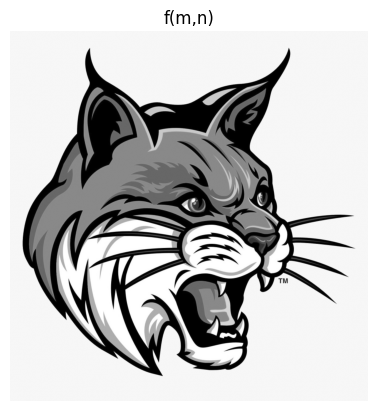

In [53]:
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread("your_image.png")

# convert to grayscale
if img.ndim == 3:
    img = img.mean(axis=2)

# normalize to [0,1]
img = img.astype(float)
img = (img - img.min()) / (img.max() - img.min())

M, N = img.shape

plt.imshow(img, cmap="gray")
plt.title("f(m,n)")
plt.axis("off")
plt.show()


#### Compute the 2D DFT of the loaded image:

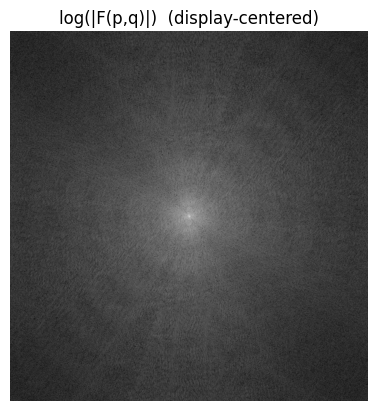

In [59]:
F = dft2(img)
mag = np.log1p(np.abs(F))

mag = np.fft.fftshift(mag)

plt.imshow(mag, cmap="gray")
plt.title("log(|F(p,q)|)  (display-centered)")
plt.axis("off")
plt.show()


#### Design your image filter

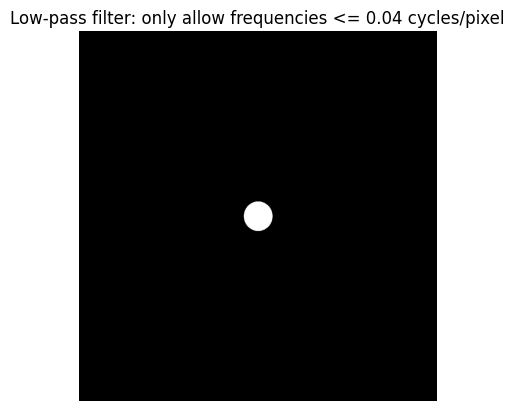

In [67]:
fx = np.fft.fftfreq(N)
fy = np.fft.fftfreq(M)
FX, FY = np.meshgrid(fx, fy)

R = np.sqrt(FX**2 + FY**2) # the radial frequency magnitude

fc = 0.04 # YOUR CUTOFF FOR LOW-PASS FILTER!

mask_lp = (R <= fc).astype(float)

# visualize the mask (centered for display only)
mask_vis = np.roll(np.roll(mask_lp, M//2, axis=0), N//2, axis=1)
plt.imshow(mask_vis, cmap="gray")
plt.title("Low-pass filter: only allow frequencies <= {:.2f} cycles/pixel".format(fc))
plt.axis("off")
plt.show()


#### Obtain filtered image: Convolution theorem
The convolution theorem allows us to multiply spectra! Remember that the raw images could not be manipulated. But the frequency spectra (DFT) of the image can now be multiplied to the designed filter above (the low-pass filter). When we multiply the two, everything outside of the white circle will turn to zero => all frequencies not in that region are eliminated. On eliminating all high frequencies, we get a filtered signal (image) that looks blurred

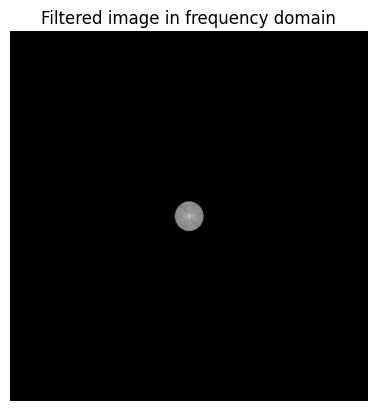

In [68]:
filtered_image_in_freq = F * mask_lp

mag_filtered_image_in_freq = np.log1p(np.abs(filtered_image_in_freq))
mag_filtered_image_in_freq = np.fft.fftshift(mag_filtered_image_in_freq)

plt.imshow(mag_filtered_image_in_freq, cmap="gray")
plt.title("Filtered image in frequency domain")
plt.axis("off")
plt.show()

The above does not make sense! But...

#### Now using inverse DFT, convert image spectra to the image 

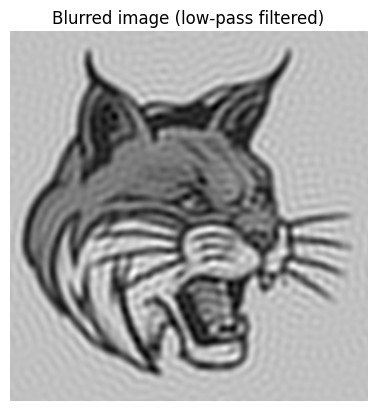

In [69]:
img_blur = np.real(idft2(filtered_image_in_freq))

plt.imshow(img_blur, cmap="gray")
plt.title("Blurred image (low-pass filtered)")
plt.axis("off")
plt.show()


### In-class Activity:

Depending on the time you have in-class, work on as many of the following as possible. The #1 should be an easy task that you can achieve.

1. Try different cut-off frequencies to obtain different blurs on the image
2. Implement a high-pass filter to obtain a filtered image that detects the edges.
3. Challenge: After obtaining the edge-filtered image, threshold it such that you can show that you detected the boundary. This has a very important application: image segmentation. 